In [1]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = [ 
 'orfs_MSY24.fasta',
 'orfs_MSY25.fasta',
 'orfs_MSY26.fasta',
 'orfs_MSY27.fasta',
 'orfs_MSY28.fasta',
 'orfs_MSY29.fasta',
 'orfs_MSY30.fasta',
 'orfs_MSY31.fasta',
 'orfs_MSY32.fasta',
 'orfs_MSY33.fasta',
 'orfs_MSY34.fasta',
 'orfs_MSY35.fasta',
 'orfs_MSY36.fasta',
 'orfs_MSY37.fasta',
 'orfs_MSY38.fasta',
 'orfs_MSY39.fasta'
]

In [3]:
strain = []
handle = []
seq = []

for file in files:
    input_file = f"../data/16_genomes/orf_fastas/{file}"

    for record in SeqIO.parse(input_file, "fasta"):
        strain.append(re.split('\.|_', file)[1])
        handle.append(record.id)
        seq.append(str(record.seq))

df = pd.DataFrame({'strain':strain, 'handle':handle, 'seq':seq})

In [4]:
df['aa'] = df.seq.apply(lambda x: str(Seq(str(x)).translate()))

/data/chambersmj/conda/envs/alignparse-environment/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [5]:
df['category'] = df.handle.str.split("_").str[-1]

In [6]:
# not divisible by 3
df['odd_length'] = (df.seq.str.len() % 3) != 0

In [7]:
# premature stop codon
df['premature_stop'] = df['aa'].str[:-1].str.contains("\*")

In [8]:
df.query('odd_length')

,strain,handle,seq,aa,category,odd_length,premature_stop
0,MSY24,MSY24_gene1_additional.copy,ATGGACTTGAATCAAAGAAAGGAAAAAAGGGCCAGCATGTTGGATG...,MDLNQRKEKRASMLDAVAPGQTCLLTQWN**KEWTDWLKNRRQLPC...,additional.copy,True,True
3,MSY24,MSY24_gene4_retained,ATGCGAGTTCTCATCGGAACGAAATTAGTGACTGAAGGAATTGACA...,MRVLIGTKLVTEGIDIKQLMMVIMLDNRLNIIELIQGVGRLRDGGL...,retained,True,False
5,MSY24,MSY24_gene6_additional.copy,ATGAAAGTTTCCGATAGGCGTAAGTTTGAAAAAGCAAACTTTGACG...,MKVSDRRKFEKANFDEFESALNNKNDLVHCPSITLFESIPTEVRSF...,additional.copy,True,True
6,MSY24,MSY24_gene7_dubious,ATGTCCCTACGGCCTTGTCTAACACCATCCAGCATGCAATAAGGTG...,MSLRPCLTPSSMQ*GDIYIPTPTHITTLTLPYHYPILTLILPVSQL...,dubious,True,True
8,MSY24,MSY24_gene9_additional.homolog,ATGCATGACCTCTGGGTAATTAGCACTTCTCCCGCTTGTTTTGAGA...,MHDLWVISTSPACFEILYINIANKRIERGWQPLQ*KLFVLIMRQC,additional.homolog,True,True
...,...,...,...,...,...,...,...
108224,MSY39,MSY39_gene6581_dubious,ATATTAATAATATATATATTATTTATTATAATGAAAACCTATCCTA...,ILIIYILFIIMKTYPKLSYHIISYHIILYLII*YIKYSLYMRL*LL...,dubious,True,True
108225,MSY39,MSY39_gene6582_diverged,ATGGTACAAAGATGATTATATTCAACAAATGCAAAAGATATTGCAG...,MVQR*LYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,diverged,True,True
108226,MSY39,MSY39_gene6583_retained,ATGGTACAAAGATGATTATATTCAACAAATGCAAAAGATATTGCAG...,MVQR*LYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,retained,True,True
108227,MSY39,MSY39_gene6584_diverged,ATGGTACAAAGATGATTATATTCAACAAATGCAAAAGATATTGCAG...,MVQR*LYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...,diverged,True,True


In [9]:
df.query('odd_length').shape

(7727, 7)

In [10]:
df.query('odd_length')['odd_length'].sum()

7727

In [11]:
df.query('odd_length')['premature_stop'].sum()

6453

In [12]:
7727 - 6453

1274

In [13]:
df.query('odd_length')['category'].value_counts()

retained              5043
dubious               1999
diverged               295
additional.copy        230
additional.homolog     160
Name: category, dtype: int64

In [14]:
df.query('odd_length').query('~premature_stop').shape

(1274, 7)

In [15]:
df.query('odd_length').query('~premature_stop')['category'].value_counts()

retained              733
dubious               298
diverged              121
additional.copy        82
additional.homolog     40
Name: category, dtype: int64

In [16]:
df.shape

(108350, 7)

In [17]:
df.query('premature_stop').shape

(9504, 7)

<AxesSubplot:title={'center':'Premature stops (n=9504/108350)'}>

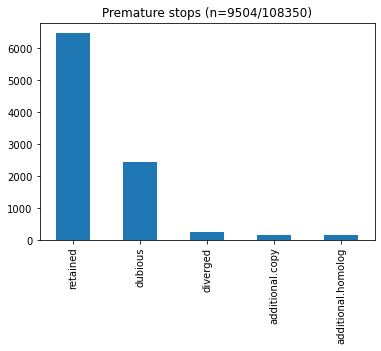

In [18]:
df.query('premature_stop')['category'].value_counts().plot.bar(title='Premature stops (n=9504/108350)')

In [22]:
9504/108350

0.08771573604060914

In [26]:
df.query('odd_length').shape[0] / df.shape[0]

0.07131518227964928

In [27]:
df.query('premature_stop').shape[0] / df.shape[0]

0.08771573604060914

In [28]:
# 10% of the 16genome sequences have odd ORF (premature stop or odd length)
df.query('odd_length or premature_stop').shape[0] / df.shape[0]

0.09947392708814029

<AxesSubplot:xlabel='strain'>

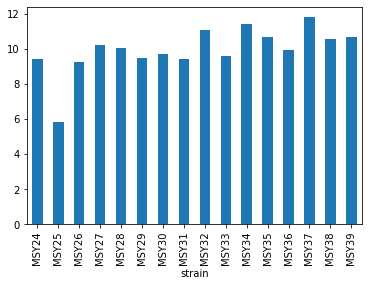

In [35]:
(df.query('odd_length or premature_stop').groupby('strain').handle.nunique() / df.groupby('strain').handle.nunique() * 100).plot.bar()

In [20]:
df.query('premature_stop').shape

(9504, 7)

In [21]:
data = df.query('premature_stop').groupby('strain', as_index=False)['category'].value_counts()
g = sns.barplot(x='category',y='count',hue='strain',data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_ylim(0,460)
g.set_title('Premature Stop Codon (n=9604/108350)')

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [ ]:
df.query('odd_length').shape

In [ ]:
data = df.query('odd_length').groupby('strain', as_index=False)['category'].value_counts()
g = sns.barplot(x='category',y='count',hue='strain',data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title('Length NOT divisible by 3 (n=7727/108350)')
g.set_ylim(0,460)

In [ ]:
df.query('odd_length and premature_stop').shape

In [ ]:
data = df.query('odd_length and premature_stop').groupby('strain', as_index=False)['category'].value_counts()
g = sns.barplot(x='category',y='count',hue='strain',data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title('Premature stop and length NOT divisible by 3 (n=6453/108350)')
g.set_ylim(0,460)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

data = df.query('premature_stop').groupby('strain', as_index=False)['category'].value_counts()
g = sns.barplot(ax=axes[0],x='category',y='count',hue='strain',data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_ylim(0,460)
g.legend_.remove()
g.set_title('Premature Stop Codon (n=9604/108350)')

data = df.query('odd_length').groupby('strain', as_index=False)['category'].value_counts()
g = sns.barplot(ax=axes[1], x='category',y='count',hue='strain',data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title('Length NOT divisible by 3 (n=7727/108350)')
g.set_ylim(0,460)
g.legend_.remove()

data = df.query('odd_length and premature_stop').groupby('strain', as_index=False)['category'].value_counts()
g = sns.barplot(ax=axes[2], x='category',y='count',hue='strain',data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title('Premature stop AND odd length (n=6453/108350)')
g.set_ylim(0,460)

In [ ]:
df.query('odd_length and premature_stop')['premature_stop'].sum()